In [69]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import plotly.express as px
import numpy as np


# Read the CSV file into a pandas DataFrame
file_name = 'Uber-Jan-Feb-FOIL.csv'
df = pd.read_csv(file_name)

# Convert 'date' column to datetime format to handle dates properly
df['datetime'] = pd.to_datetime(df['date'])

# Group by 'datetime' and sum the 'active_vehicles' and 'trips'
summary_df = df.groupby('datetime')[['active_vehicles', 'trips']].sum()

# Sort the summary DataFrame by 'datetime' to ensure chronological order
summary_df = summary_df.sort_index()

# Display the summary DataFrame
(summary_df).head()


,active_vehicles,trips
datetime,,
2015-01-01,6885,56437
2015-01-02,6330,39189
2015-01-03,6510,58449
2015-01-04,5838,40798
2015-01-05,6884,42752


In [70]:
# Read the NYC weather data CSV file into a pandas DataFrame
nyc_file_name = 'NYC.csv'
nyc_data = pd.read_csv(nyc_file_name)


# Convert the 'datetime' column to datetime format for proper sorting
nyc_data['datetime'] = pd.to_datetime(nyc_data['datetime'])

# Select the relevant columns and organize by datetime
selected_columns = ['datetime', 'tempmax', 'humidity', 'precip', 'windspeed']
organized_nyc_data = nyc_data[selected_columns]

# Sort the DataFrame by datetime to ensure proper chronological order
organized_nyc_data = organized_nyc_data.sort_values(by='datetime')

# Reset index for a clean DataFrame
organized_nyc_data.reset_index(drop=True, inplace=True)

# Display the organized NYC weather DataFrame
("\nOrganized NYC Weather Data:")
(organized_nyc_data).head()


,datetime,tempmax,humidity,precip,windspeed
0,2015-01-01,3.7,38.7,0.000,23.0
1,2015-01-02,5.7,42.0,0.024,27.4
2,2015-01-03,4.7,70.9,17.008,15.9
3,2015-01-04,13.0,88.5,8.886,27.2
4,2015-01-05,10.0,37.6,0.000,39.3


In [71]:
# Assuming summary_df and organized_nyc_data are already defined

# Merge the two DataFrames on 'datetime'
merged_df = pd.merge(summary_df.reset_index(), organized_nyc_data, on='datetime', how='outer')

# Display the merged DataFrame
(merged_df).head()


,datetime,active_vehicles,trips,tempmax,humidity,precip,windspeed
0,2015-01-01,6885,56437,3.7,38.7,0.000,23.0
1,2015-01-02,6330,39189,5.7,42.0,0.024,27.4
2,2015-01-03,6510,58449,4.7,70.9,17.008,15.9
3,2015-01-04,5838,40798,13.0,88.5,8.886,27.2
4,2015-01-05,6884,42752,10.0,37.6,0.000,39.3


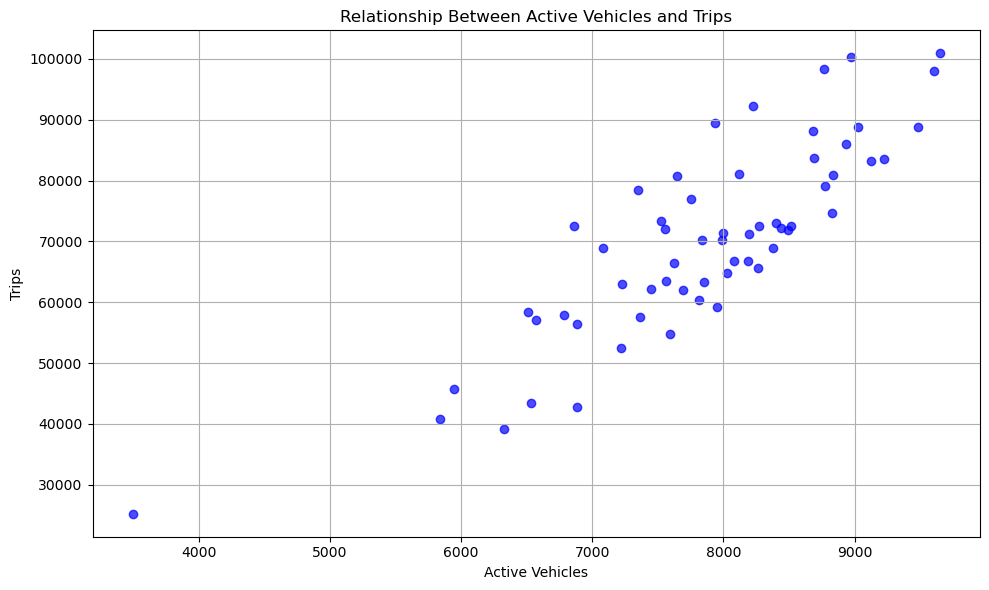

In [72]:
# Basic scatter plot setup
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['active_vehicles'], summary_df['trips'], alpha=0.7, color="blue")

# Add title and labels
plt.title('Relationship Between Active Vehicles and Trips')
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


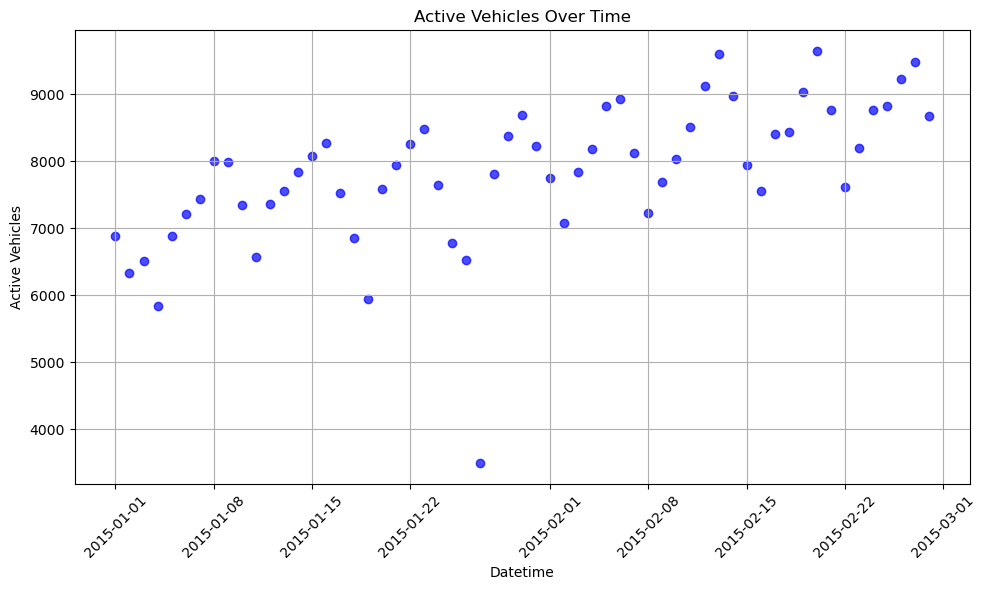

In [73]:
# Convert 'datetime' to datetime format if not already
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'], errors='coerce')

# Plot setup
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['datetime'], merged_df['active_vehicles'], alpha=0.7, color="blue")

# Add title and labels
plt.title('Active Vehicles Over Time')
plt.xlabel('Datetime')
plt.ylabel('Active Vehicles')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()



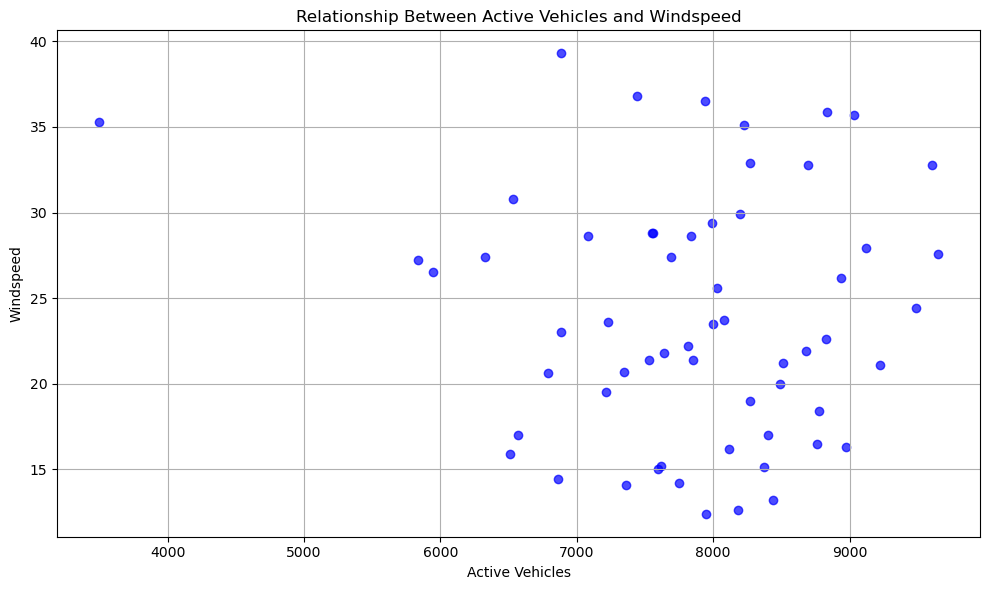

In [74]:
# Plot setup
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['active_vehicles'], merged_df['windspeed'], alpha=0.7, color="blue")

# Add title and labels
plt.title('Relationship Between Active Vehicles and Windspeed')
plt.xlabel('Active Vehicles')
plt.ylabel('Windspeed')
plt.grid(True)
plt.tight_layout()
plt.show()


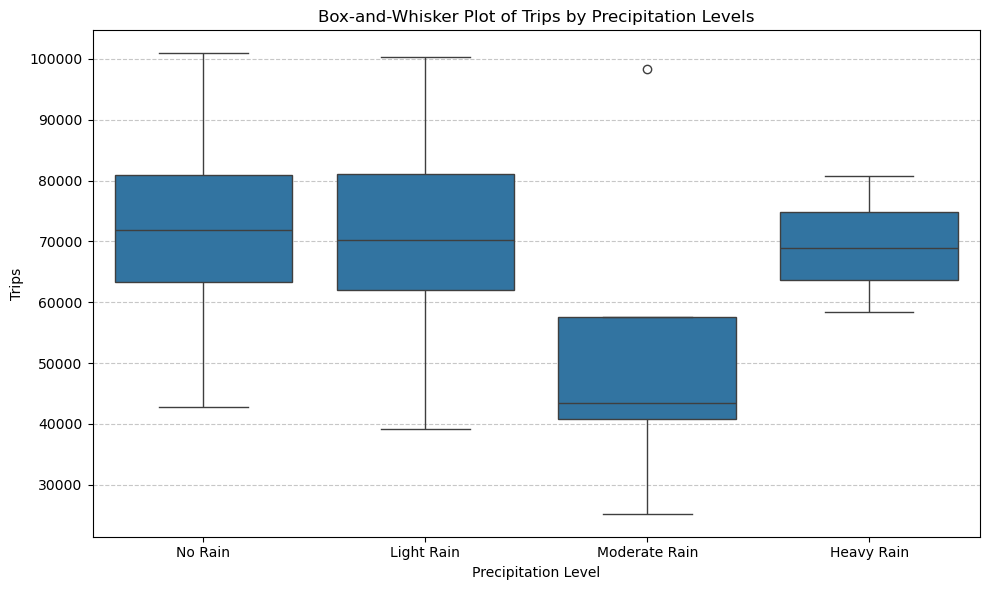

In [75]:
# Categorize 'precip' into levels
merged_df['precip_level'] = pd.cut(merged_df['precip'], bins=[-0.01, 0, 5, 15, 50], 
                                   labels=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain'])

# Plot the box-and-whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='precip_level', y='trips')

# Add titles and labels
plt.title('Box-and-Whisker Plot of Trips by Precipitation Levels')
plt.xlabel('Precipitation Level')
plt.ylabel('Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


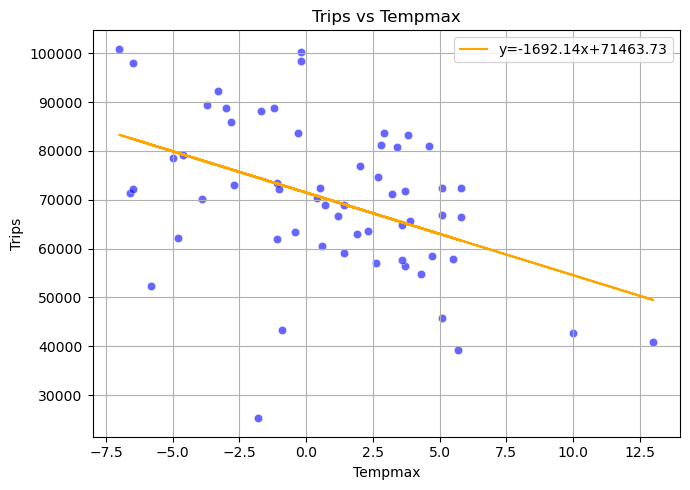

-0.44499179899195695

In [76]:
# Plot setup
plt.figure(figsize=(7, 5))
sns.scatterplot(x=merged_df['tempmax'], y=merged_df['trips'], color="blue", alpha=0.6)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['tempmax'], merged_df['trips'])
plt.plot(merged_df['tempmax'], intercept + slope * merged_df['tempmax'], 'orange', label=f"y={slope:.2f}x+{intercept:.2f}")

plt.title('Trips vs Tempmax')
plt.xlabel('Tempmax')
plt.ylabel('Trips')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
r_value


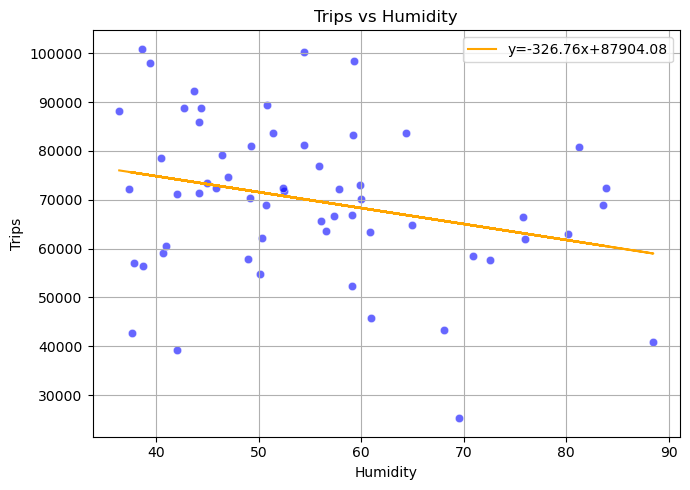

-0.27706882865616483

In [77]:
# Plot setup
plt.figure(figsize=(7, 5))
sns.scatterplot(x=merged_df['humidity'], y=merged_df['trips'], color="blue", alpha=0.6)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['humidity'], merged_df['trips'])
plt.plot(merged_df['humidity'], intercept + slope * merged_df['humidity'], 'orange', label=f"y={slope:.2f}x+{intercept:.2f}")

plt.title('Trips vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Trips')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
r_value

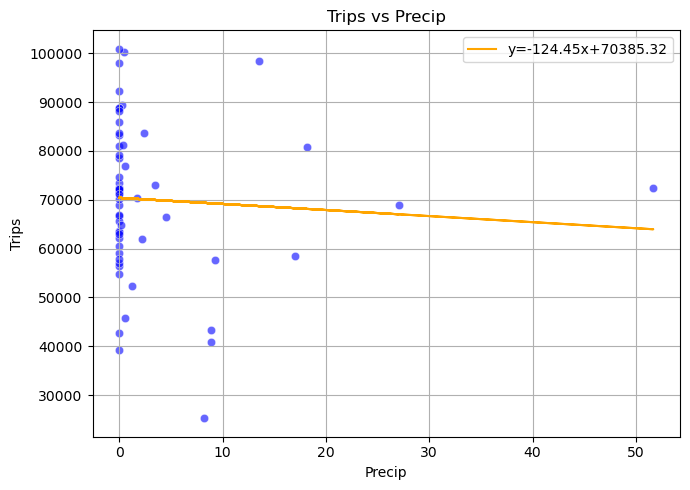

-0.06537223743171226

In [78]:
# Plot setup
plt.figure(figsize=(7, 5))
sns.scatterplot(x=merged_df['precip'], y=merged_df['trips'], color="blue", alpha=0.6)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['precip'], merged_df['trips'])
plt.plot(merged_df['precip'], intercept + slope * merged_df['precip'], 'orange', label=f"y={slope:.2f}x+{intercept:.2f}")

plt.title('Trips vs Precip')
plt.xlabel('Precip')
plt.ylabel('Trips')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
r_value

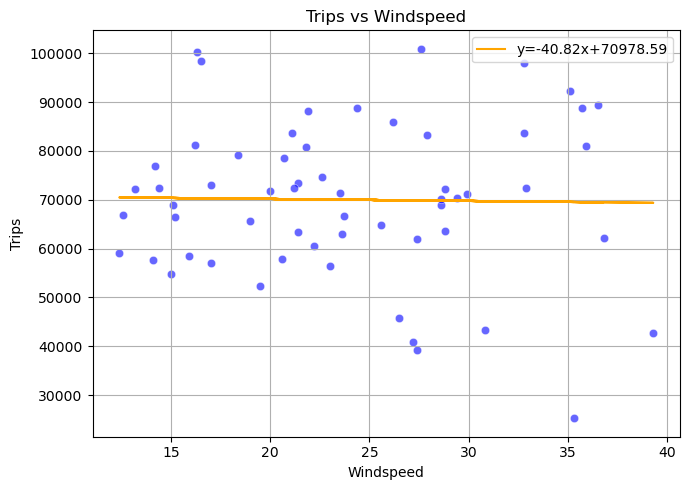

-0.01853090226601202

In [79]:
# Plot setup
plt.figure(figsize=(7, 5))
sns.scatterplot(x=merged_df['windspeed'], y=merged_df['trips'], color="blue", alpha=0.6)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['windspeed'], merged_df['trips'])
plt.plot(merged_df['windspeed'], intercept + slope * merged_df['windspeed'], 'orange', label=f"y={slope:.2f}x+{intercept:.2f}")

plt.title('Trips vs Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Trips')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
r_value

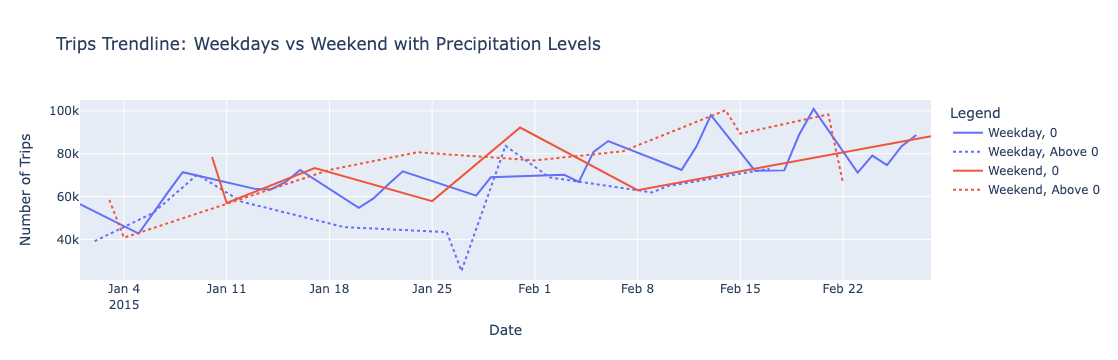

In [80]:
# Adjusted classification for precipitation level (no % sign)
merged_df['precip_level'] = merged_df['precip'].apply(lambda x: 'Above 0' if x > 0 else '0')

# Create a new column for the day of the week
merged_df['day_of_week'] = merged_df['datetime'].dt.day_name()

# Classify day_of_week into 'Weekday' and 'Weekend'
merged_df['category'] = merged_df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Prepare the plot using plotly
fig = px.line(
    merged_df,
    x='datetime',
    y='trips',
    color='category',
    line_dash='precip_level',
    labels={'datetime': 'Date', 'trips': 'Number of Trips', 'category': 'Day Type', 'precip_level': 'Precipitation Level'},
    title='Trips Trendline: Weekdays vs Weekend with Precipitation Levels',
    hover_data={'datetime': True, 'trips': True, 'day_of_week': True, 'precip_level': True}
)

# Customize legend and layout for clarity
fig.update_layout(
    legend_title_text='Legend',
    xaxis_title='Date',
    yaxis_title='Number of Trips'
)

# Show interactive plot
fig.show()


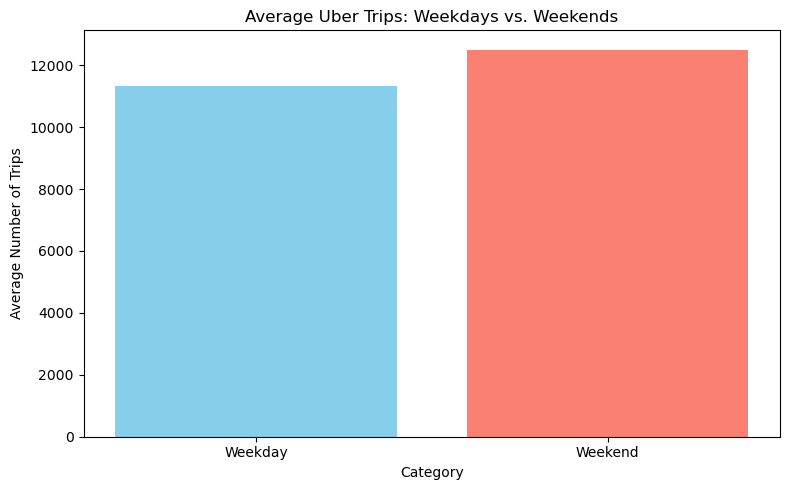

In [81]:
# How do Uber ride volumes change when comparing weekdays vs weekends?

# Convert the 'datetime' column to datetime format 
df['datetime'] = pd.to_datetime(df['datetime'])

# Create a new column 'day_of_week' that stores the name of the day for each date
df['day_of_week'] = df['datetime'].dt.day_name()

# Create a new column 'category' that labels each day as 'Weekend' or 'Weekday'
df['category'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Calculate the average number of trips for weekdays and weekends by grouping the data by 'category'
average_trips = df.groupby('category')['trips'].mean().reset_index()

# Plot a bar chart 
plt.figure(figsize=(8, 5))
plt.bar(average_trips['category'], average_trips['trips'], color=['skyblue', 'salmon'])

# Add title and labels
plt.title('Average Uber Trips: Weekdays vs. Weekends')
plt.xlabel('Category')
plt.ylabel('Average Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

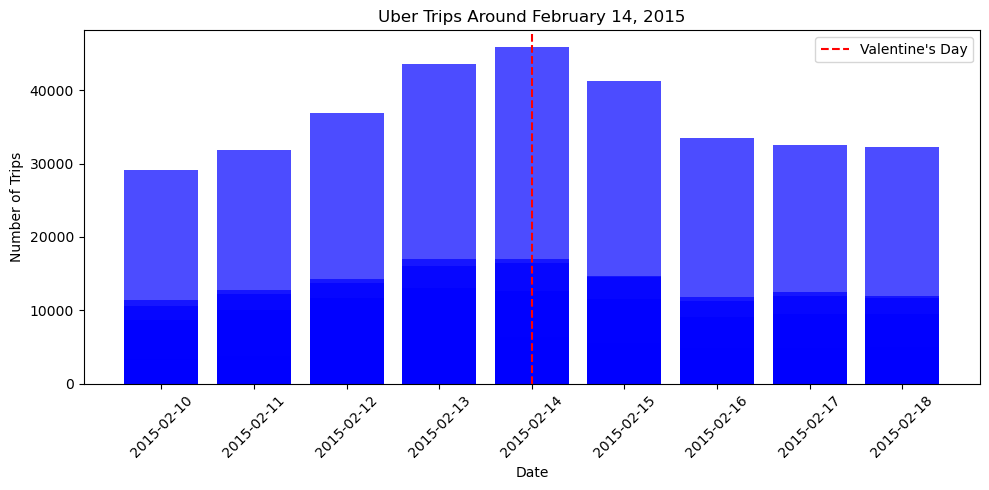

In [82]:
# Define the start and end dates for filtering the DataFrame
start_date = '2015-02-10'
end_date = '2015-02-18'
filtered_df = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(filtered_df['datetime'], filtered_df['trips'], color='blue', alpha=0.7)

#Add a vertical line on February 14 to highlight Valentine's Day
plt.axvline(x=pd.Timestamp('2015-02-14'), color='red', linestyle='--', label='Valentine\'s Day')

# Add title and labels
plt.title('Uber Trips Around February 14, 2015')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

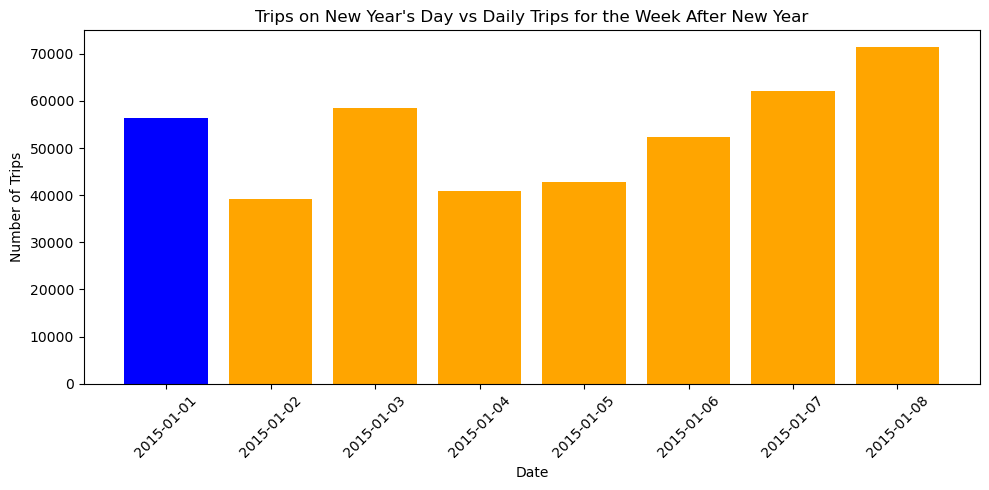

In [83]:
#compare the trips on New Year's Day with the trips for each day in the week following New Year's
# Convert the 'datetime' column to datetime format 
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Define the date for New Year's Day
new_year_date = '2015-01-01'

# Extract the number of trips on New Year's Day
trips_new_year = merged_df.loc[merged_df['datetime'] == new_year_date, 'trips'].values[0]

# Filter the DataFrame for the week after New Year's Day (from January 2 to January 8, 2015)
after_new_year_week = merged_df[(merged_df['datetime'] > new_year_date) & (merged_df['datetime'] <= '2015-01-08')]

# Create a subset DataFrame containing 'datetime' and 'trips' for the week after New Year's Day
daily_trips_after_new_year = after_new_year_week[['datetime', 'trips']]

# Create a DataFrame for New Year's Day trips for comparison
daily_trips_comparison = pd.DataFrame({
    'datetime': [new_year_date],
    'trips': [trips_new_year]
})

# Concatenate the New Year's Day DataFrame with the daily trips DataFrame for the week after New Year's Day
comparison_df = pd.concat([daily_trips_comparison, daily_trips_after_new_year], ignore_index=True)

# Convert the 'datetime' column to datetime format
comparison_df['datetime'] = pd.to_datetime(comparison_df['datetime'])
comparison_df.set_index('datetime', inplace=True)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(comparison_df.index, comparison_df['trips'], color=['blue'] + ['orange'] * (len(comparison_df) - 1))

# Add title and labels
plt.title('Trips on New Year\'s Day vs Daily Trips for the Week After New Year')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/6s/l03_fl297y371779cq3vbqgr0000gn/T/ipykernel_87854/4233588030.py:18: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



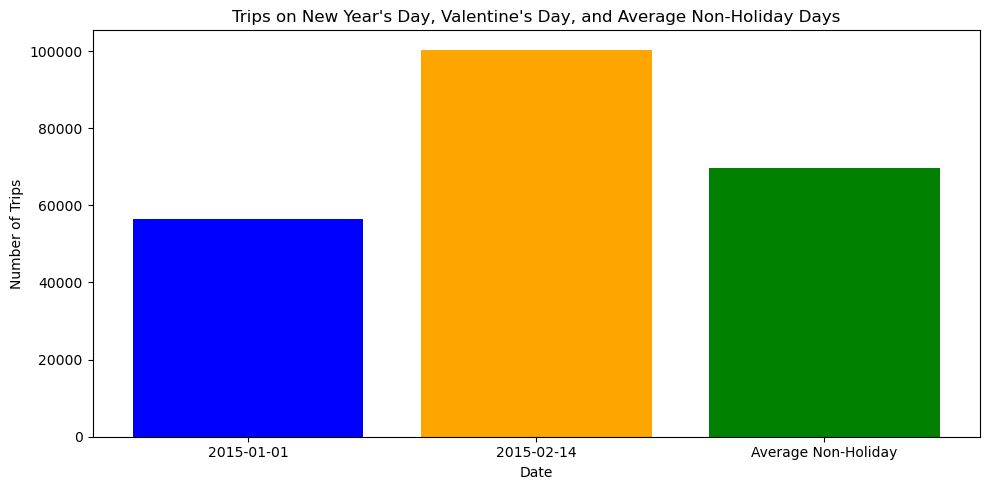

In [84]:
# Define specific holiday dates for analysis
new_year_date = '2015-01-01'
valentine_date = '2015-02-14'

# Extract the number of trips taken on New Year's Day from the merged DataFrame
trips_new_year = merged_df.loc[merged_df['datetime'] == new_year_date, 'trips'].values[0]

# Extract the number of trips taken on Valentine's Day from the merged DataFrame
trips_valentine = merged_df.loc[merged_df['datetime'] == valentine_date, 'trips'].values[0]

# Create a Series containing the 'datetime' column from the merged DataFrame
date_range = merged_df['datetime']

# Define a list of holiday dates
holiday_dates = ['2015-01-01', '2015-02-14']

# Filter out holiday dates from the date range to get non-holiday dates
non_holiday_dates = date_range[~date_range.isin(holiday_dates)]

# Calculate the average number of trips on non-holiday dates
average_non_holiday_trips = merged_df[merged_df['datetime'].isin(non_holiday_dates)]['trips'].mean()

# Create a DataFrame for New Year's Day trips
new_year_trips_comparison = pd.DataFrame({
    'datetime': [new_year_date],
    'trips': [trips_new_year]
})

# Create a DataFrame for Valentine's Day trips
valentine_trips_comparison = pd.DataFrame({
    'datetime': [valentine_date],
    'trips': [trips_valentine]
})

#Create a DataFrame for the average number of trips on non-holiday days
average_non_holiday_df = pd.DataFrame({
    'datetime': ['Average Non-Holiday'],
    'trips': [average_non_holiday_trips]
})

# Concatenate all comparison DataFrames into one for visualization
comparison_df = pd.concat([new_year_trips_comparison, valentine_trips_comparison, average_non_holiday_df], ignore_index=True)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(comparison_df['datetime'], comparison_df['trips'], color=['blue', 'orange', 'green'])

# Add title and labels
plt.title("Trips on New Year's Day, Valentine's Day, and Average Non-Holiday Days")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks()
plt.tight_layout()
plt.show()

In [85]:
# Convert the 'datetime' column to datetime format 
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'], errors='coerce')

# Create a new column 'month_name' in the DataFrame
merged_df['month_name'] = merged_df['datetime'].dt.month_name()

merged_df.head()


,datetime,active_vehicles,trips,tempmax,humidity,precip,windspeed,precip_level,day_of_week,category,month_name
0,2015-01-01,6885,56437,3.7,38.7,0.000,23.0,0,Thursday,Weekday,January
1,2015-01-02,6330,39189,5.7,42.0,0.024,27.4,Above 0,Friday,Weekday,January
2,2015-01-03,6510,58449,4.7,70.9,17.008,15.9,Above 0,Saturday,Weekend,January
3,2015-01-04,5838,40798,13.0,88.5,8.886,27.2,Above 0,Sunday,Weekend,January
4,2015-01-05,6884,42752,10.0,37.6,0.000,39.3,0,Monday,Weekday,January


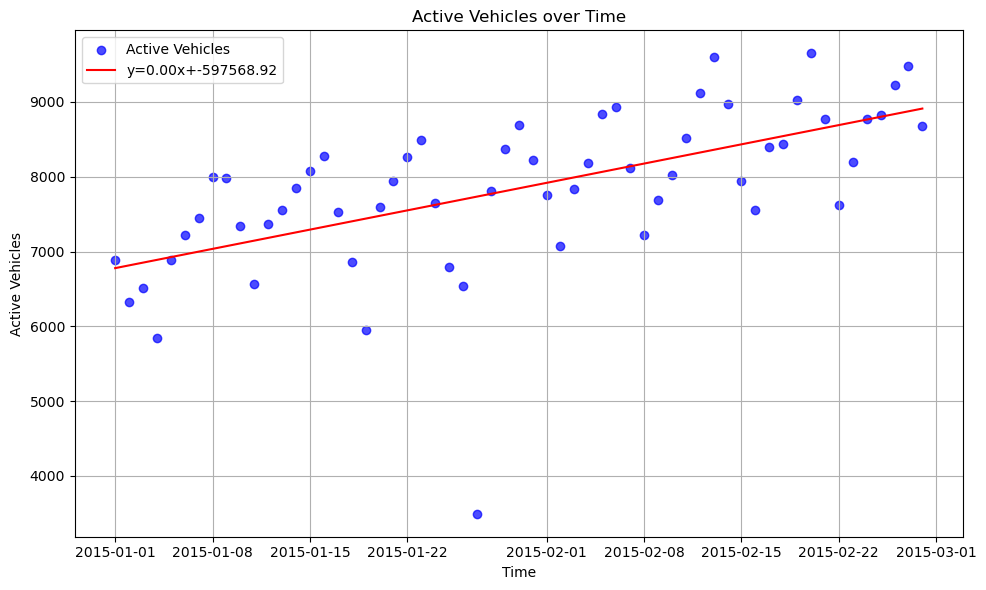

Correlation coefficient (r): 0.598


In [86]:
# How did the number of Uber Drivers and associated trips evolve over the course of this data set?

# Convert 'datetime' column to datetime format
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'], errors='coerce')

# Ensure 'active_vehicles' is numeric
merged_df['active_vehicles'] = pd.to_numeric(merged_df['active_vehicles'], errors='coerce')

# Remove any NaN values
merged_df = merged_df.dropna(subset=['datetime', 'active_vehicles'])

# Convert datetime to numeric format (timestamp) for regression analysis
merged_df['timestamp'] = merged_df['datetime'].astype(np.int64) // 10**9  # Convert to seconds

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['timestamp'], merged_df['active_vehicles'])

# Calculate regression values
regress_values = slope * merged_df['timestamp'] + intercept

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['datetime'], merged_df['active_vehicles'], alpha=0.7, color='blue', label='Active Vehicles')
plt.plot(merged_df['datetime'], regress_values, 'red', label=f"y={slope:.2f}x+{intercept:.2f}")
plt.title('Active Vehicles over Time')
plt.xlabel('Time')
plt.ylabel('Active Vehicles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Correlation coefficient (r): {r_value:.3f}")

# Significant Active Vehicle increase over time

/var/folders/6s/l03_fl297y371779cq3vbqgr0000gn/T/ipykernel_87854/721338923.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



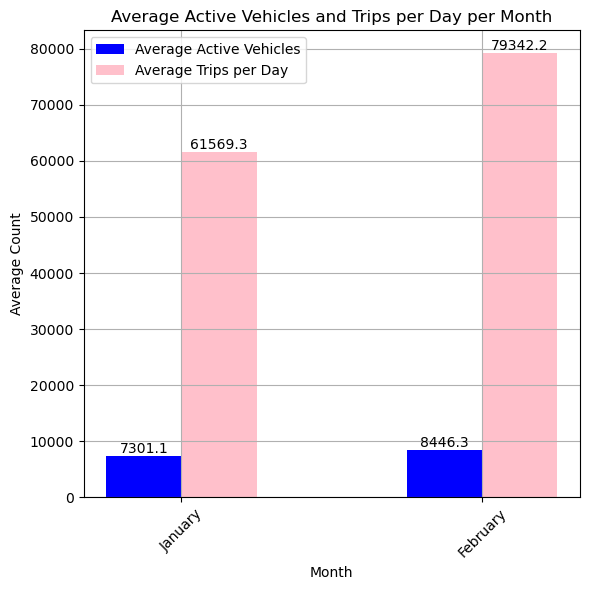

In [88]:
#Convert the 'month_name' column to a categorical data type 
merged_df['month_name'] = pd.Categorical(merged_df['month_name'],
    categories=['January', 'February'],
    ordered=True)

# Group by the 'month' column and calculate the average of 'active_vehicles' and 'trips' per month
monthly_avg = merged_df.groupby('month_name').agg({
    'active_vehicles': 'mean',
    'trips': 'mean'
})

# Plotting the bar chart
plt.figure(figsize=(6, 6))

# Define the width of each bar and position them with an offset
bar_width = 0.25
index = np.arange(len(monthly_avg))

# Plot average active vehicles
bars1 = plt.bar(index, monthly_avg['active_vehicles'], bar_width, label='Average Active Vehicles', color='blue')
# Plot average trips
bars2 = plt.bar(index + bar_width, monthly_avg['trips'], bar_width, label='Average Trips per Day', color='pink')

# Add data labels for average active vehicles
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# Add data labels for average trips
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# Add labels and title
plt.title('Average Active Vehicles and Trips per Day per Month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(index + bar_width / 2, monthly_avg.index.astype(str), rotation=45)
plt.legend()

# Display grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

# In just a month timeframe, the average active vehicles jumped by 1000+!
# Percentage change in Average Active vehicles from Jan to Feb is 15.69% where Average Trips per Day is 28.87%.
# While both increased between the two months, trips 